In [8]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt


sys.path.append('/home/jacob/projects/quonium/python')
from config import colr
from config import config
from config import conOutput

from core import box
from mathFunc2 import doConfigCalc,calcClassExpec,calcRelExpec2

col1, col2, col3 = '#EE2211', '#11CC22', '#1111EE'
col4, col5, col6 = '#991111', '#119922', '#111199'

conf = config()
#Set states and channels + Modify some param settings
conf['StateList'] = ['1S']
conf['ChannelList'] = ['RGA','RGR','IDQ','IRQ','IDG','IRG']
#conf['ChannelList'] = ['RGA','RGR']

conf['prCut'] = 10
#conf['NPts'] = 400

#conf['Nbb'], conf['NY'] = 6249, 1 #Low
#conf['Nbb'], conf['NY'] = 6249, 1000 #Low
#conf['L'], conf['NXPart'] = 250, 40 #Low

conf['Nbb'], conf['NY'] = 49999, 1000 #Med
conf['L'], conf['NXPart'] = 500, 40 #Med

#conf['Nbb'], conf['NY'] = 399999, 1 #High
#conf['L'], conf['NXPart'] = 1000, 80 #High

hbarc = 0.1973
conf.echoParams()

DCh = list(set(conf['ChannelList']) & set(['RGA','IDQ','IDG']))
RCh = list(set(conf['ChannelList']) & set(['RGR','IRQ','IRG']))

ColD = {'RGA':col1,'RGR':col1,'IDQ':col2,'IRQ':col2,'IDG':col3,'IRG':col3,}
ColD2 = {'RGA':col4,'RGR':col4,'IDQ':col5,'IRQ':col5,'IDG':col6,'IRG':col6,}

L : 500
dt : 1.0
T : 0.3
tFn : 100
NY : 1000
Nbb : 49999
pSampleType : 0
UniPMax : 3.0
pSampSig : 0.2
MatrElems : 0
qRGtype : 0
ECut : 40
prCut : 10
NPts : 200
ExportRates : True
NXPart : 40
NThreads : 14
HydroMode : 0
HPts : 20
doRecom : 1
doDisso : 1
RGRrateOpt : 1
Mb : 4.65
M1S : 9.091
M2S : 10.023
E1S : 0.20925
E2S : 0.723
bsig : 0.01
Ysig : 0.02
alphaS : 0.3
CF : 1.3333333333333333
NC : 3
gs : 0.75
Ch : 0
rateFile : bottom_rates_2d.tsv
boop : gleep
StateList : ['1S']
ChannelList : ['RGA', 'RGR', 'IDQ', 'IRQ', 'IDG', 'IRG']


In [2]:
from mathFunc2 import fB, vFp, calcClassExpec, calcRelExpec2, getpPts
def Ntot(dist, sep):
    return np.sum(dist)*sep
def getTotalRateDiss(RateFv, conf, st):
    pPts = getpPts(conf)
    vPts = vFp(pPts,conf['M'+st])
    s = pPts[1]-pPts[0]
    return Ntot(fB(pPts,conf['M'+st],conf['T'])*RateFv(vPts),s)
def getTotalRateRecom(RateFv, conf, st):
    pPts = getpPts(conf)
    vPts = vFp(pPts,conf['Mb'])
    s = pPts[1]-pPts[0]
    return Ntot(fB(pPts,conf['Mb'],conf['T'])*RateFv(vPts),s) 
    

In [3]:
#TPts = np.array([0.15,0.20,0.25,0.30,0.35,0.40,0.45])
#res = {ch:[] for ch in conf['ChannelList']}
#for Tv in TPts:
#    conf['T'] = Tv
#    print(Tv)
#    doConfigCalc(conf)
#    for ch in DCh:
#        res[ch].append(getTotalRateDiss(conf[ch+'_rate'+'1S'], conf, '1S'))
#    for ch in RCh:
#        res[ch].append(getTotalRateDiss(conf[ch+'_rateFv'+'1S'], conf, '1S'))



In [4]:
TPts = np.array([0.15,0.20,0.25,0.30,0.35,0.40,0.45])
#TPts = np.array([0.15,0.30,0.45])
#TPts = np.array([0.15,0.20])
res = {ch:[] for ch in conf['ChannelList']}
BRres = {ch:[] for ch in RCh}
DRres = {ch:[] for ch in DCh}
for Tv in TPts:
    conf['T'] = Tv
    print(Tv)
    doConfigCalc(conf)
    b = box(conf)
    print('Box init')
    boxRate = b.measureRrateMPH()
    boxDRate = b.measureDrate()
    for ch in DCh:
        DRres[ch].append([np.mean(boxDRate[ch]['1S']),np.std(boxDRate[ch]['1S'])/np.sqrt(conf['NY'])])
        res[ch].append(getTotalRateDiss(conf[ch+'_rate'+'1S'], conf, '1S'))
    for ch in RCh:
        BRres[ch].append([np.mean(boxRate[ch]['1S']),np.std(boxRate[ch]['1S'])/np.sqrt(conf['Nbb'])])
        res[ch].append(getTotalRateRecom(conf[ch+'_rateFv'+'1S'], conf, '1S'))
for ch in RCh:
    BRres[ch] = np.array(BRres[ch])
for ch in DCh:
    DRres[ch] = np.array(DRres[ch])

0.15
Constants set
RGA_rate1S set
RGR_rateFv1S set
IDQ_rate1S set
IRQ_vInt1S set
IRQ_rateFv1S set
IDG_rate1S set
IRG_vInt1S set
IRG_rateFv1S set
Box init
0.2
Constants set
RGA_rate1S set
RGR_rateFv1S set
IDQ_rate1S set
IRQ_vInt1S set
IRQ_rateFv1S set
IDG_rate1S set
IRG_vInt1S set
IRG_rateFv1S set
Box init
0.25
Constants set
RGA_rate1S set
RGR_rateFv1S set
IDQ_rate1S set
IRQ_vInt1S set
IRQ_rateFv1S set
IDG_rate1S set
IRG_vInt1S set
IRG_rateFv1S set
Box init
0.3
Constants set
RGA_rate1S set
RGR_rateFv1S set
IDQ_rate1S set
IRQ_vInt1S set
IRQ_rateFv1S set
IDG_rate1S set
IRG_vInt1S set
IRG_rateFv1S set
Box init
0.35
Constants set
RGA_rate1S set
RGR_rateFv1S set
IDQ_rate1S set
IRQ_vInt1S set
IRQ_rateFv1S set
IDG_rate1S set
IRG_vInt1S set
IRG_rateFv1S set
Box init
0.4
Constants set
RGA_rate1S set
RGR_rateFv1S set
IDQ_rate1S set
IRQ_vInt1S set
IRQ_rateFv1S set
IDG_rate1S set
IRG_vInt1S set
IRG_rateFv1S set
Box init
0.45
Constants set
RGA_rate1S set
RGR_rateFv1S set
IDQ_rate1S set
IRQ_vInt1S se

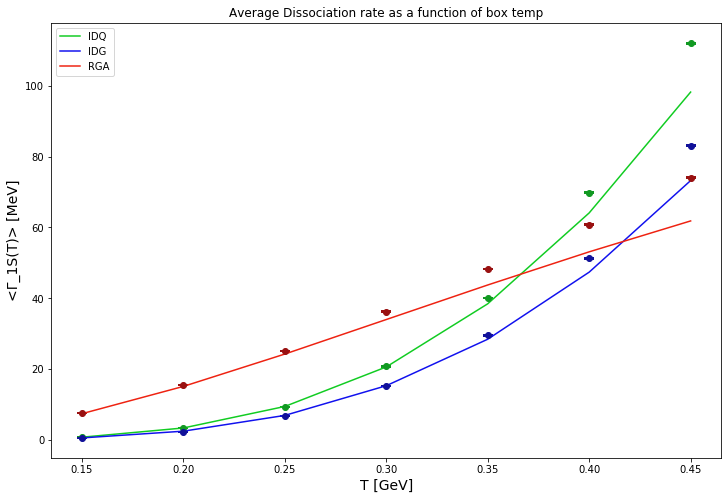

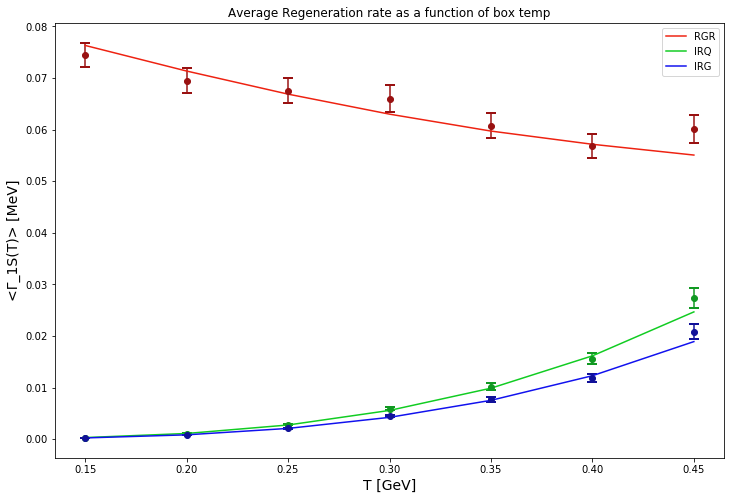

In [11]:
mevc = 1000

# Dissociation Plot
plt.figure(figsize=(12, 8))
for ch in DCh:
    plt.errorbar(TPts, DRres[ch][:,0]*mevc, yerr=DRres[ch][:,1]*mevc, fmt='o',capsize=5,capthick=2,color=ColD2[ch])
    plt.plot(TPts, np.array(res[ch])*mevc, color=ColD[ch], label=ch)
plt.title('Average Dissociation rate as a function of box temp')
plt.xlabel('T [GeV]',fontsize=14)
plt.ylabel('<Γ_1S(T)> [MeV]',fontsize=14)
#plt.yscale('log')
plt.legend()
plt.show()

#Regeneration Plot
plt.figure(figsize=(12, 8))
for ch in RCh:
    plt.errorbar(TPts, BRres[ch][:,0]*mevc, yerr=BRres[ch][:,1]*mevc, fmt='o',capsize=5,capthick=2,color=ColD2[ch])
    plt.plot(TPts, np.array(res[ch])*conf['Nbb']*mevc, color=ColD[ch], label=ch)
plt.title('Average Regeneration rate as a function of box temp')
plt.xlabel('T [GeV]',fontsize=14)
plt.ylabel('<Γ_1S(T)> [MeV]',fontsize=14)
#plt.yscale('log')
plt.legend()
plt.show()

In [6]:
DRres['RGA'][:,0]*mevc

array([ 7.52059161, 15.46444064, 25.21479753, 36.25168141, 48.19914416,
       60.77715645, 74.06142661])

In [7]:
DRres['RGA'][:,1]

array([2.11682545e-06, 7.94683791e-06, 1.92048048e-05, 3.19549716e-05,
       5.02751846e-05, 6.98599976e-05, 8.92293368e-05])